In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# === Load Dataset ===
df = pd.read_csv("WineQT.csv")

In [3]:
# Ubah target jadi biner
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [5]:
# Pisahkan fitur dan target
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# === Definisikan kernel ===
kernels = ['linear', 'poly', 'rbf']
results = []

In [9]:
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    # Evaluasi
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion Matrix': cm
    })

In [10]:
# Simpan hasil dalam file xlsx

df.to_excel("SVM_WineQT_Results.xlsx", index=False)

In [11]:
# Tampilkan hasil
pd.DataFrame(results)[['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1-Score']]

,Kernel,Accuracy,Precision,Recall,F1-Score
0,linear,0.755459,0.803571,0.725806,0.762712
1,poly,0.772926,0.760870,0.846774,0.801527
2,rbf,0.786026,0.795276,0.814516,0.804781


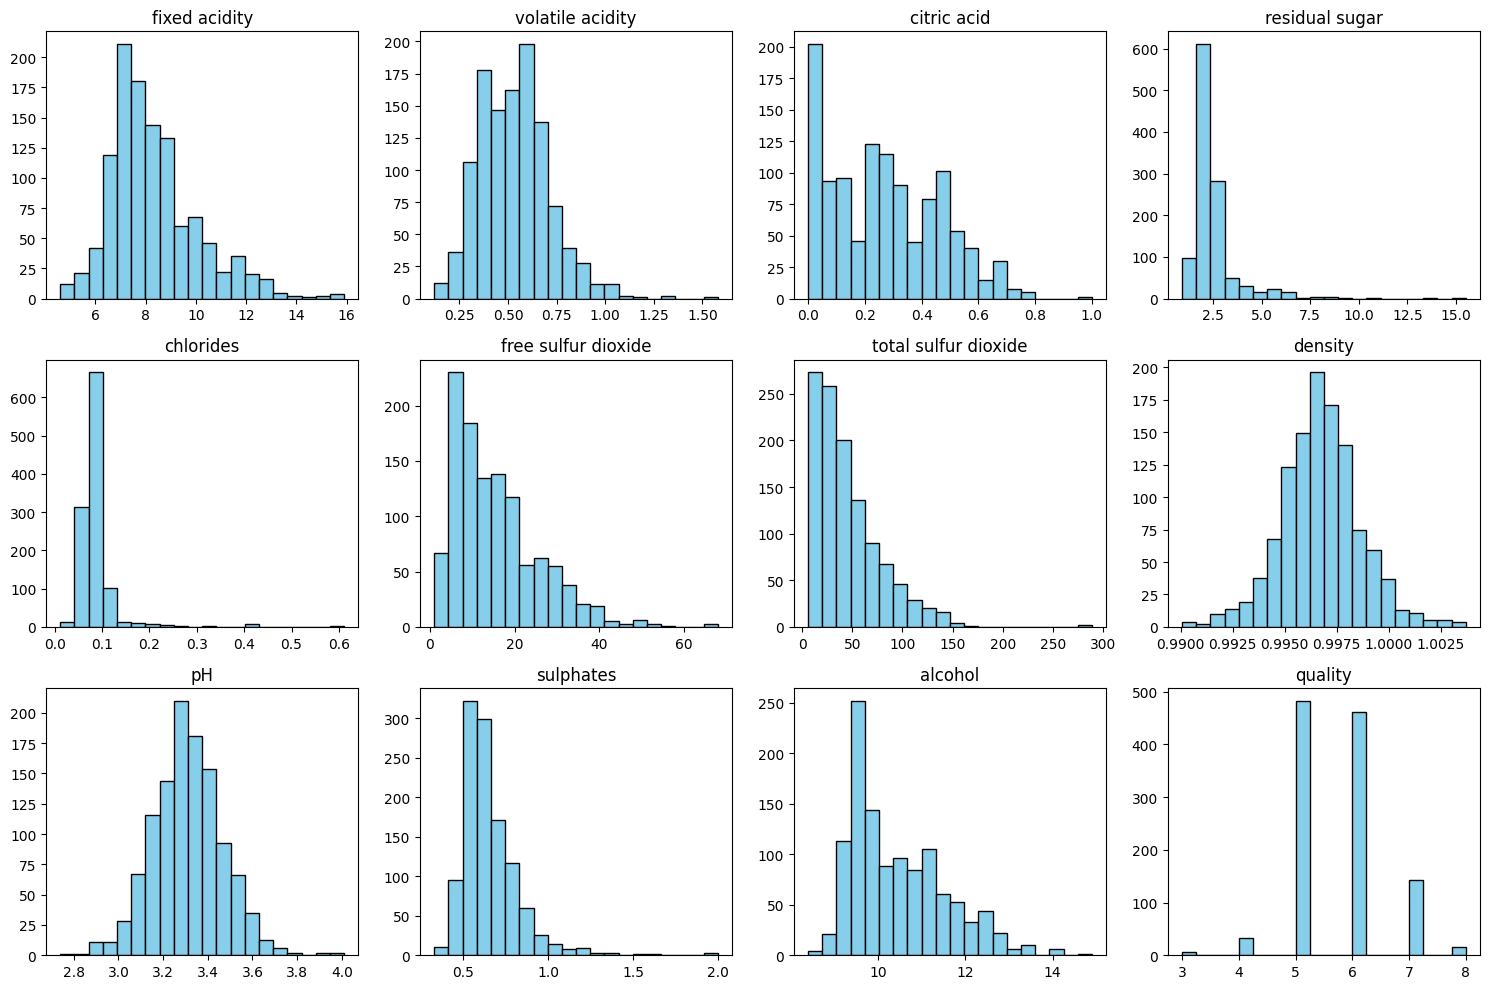

In [12]:
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:-1]):  # exclude quality_label
    plt.subplot(3, 4, i+1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

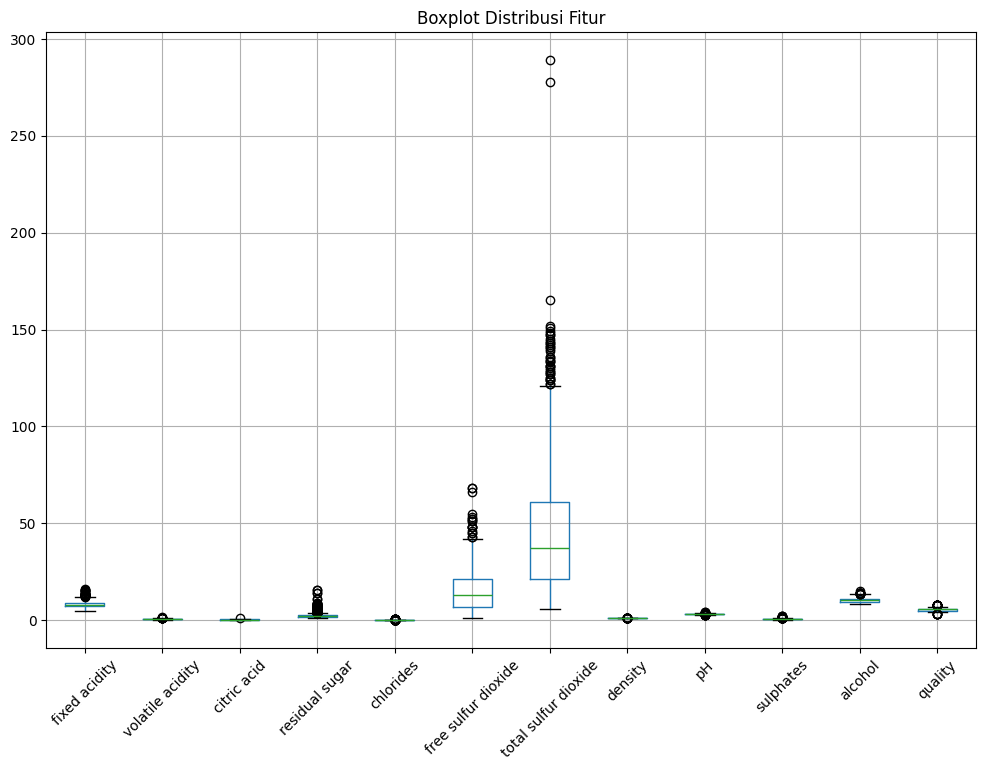

In [13]:
plt.figure(figsize=(12,8))
df[num_cols[:-1]].boxplot(rot=45)
plt.title("Boxplot Distribusi Fitur")
plt.show()


<Figure size 1200x600 with 0 Axes>

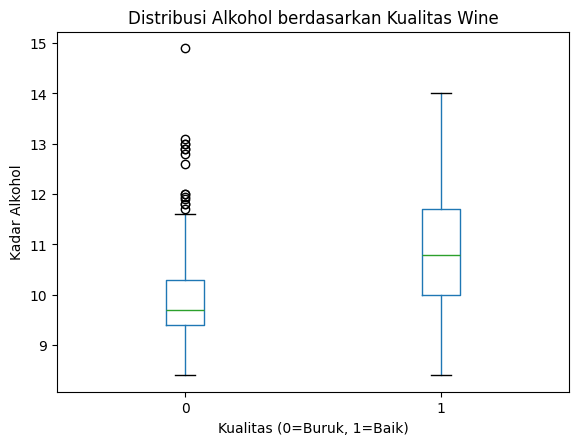

In [14]:
plt.figure(figsize=(12,6))
df.boxplot(column='alcohol', by='quality_label', grid=False)
plt.title('Distribusi Alkohol berdasarkan Kualitas Wine')
plt.suptitle('')
plt.xlabel('Kualitas (0=Buruk, 1=Baik)')
plt.ylabel('Kadar Alkohol')
plt.show()


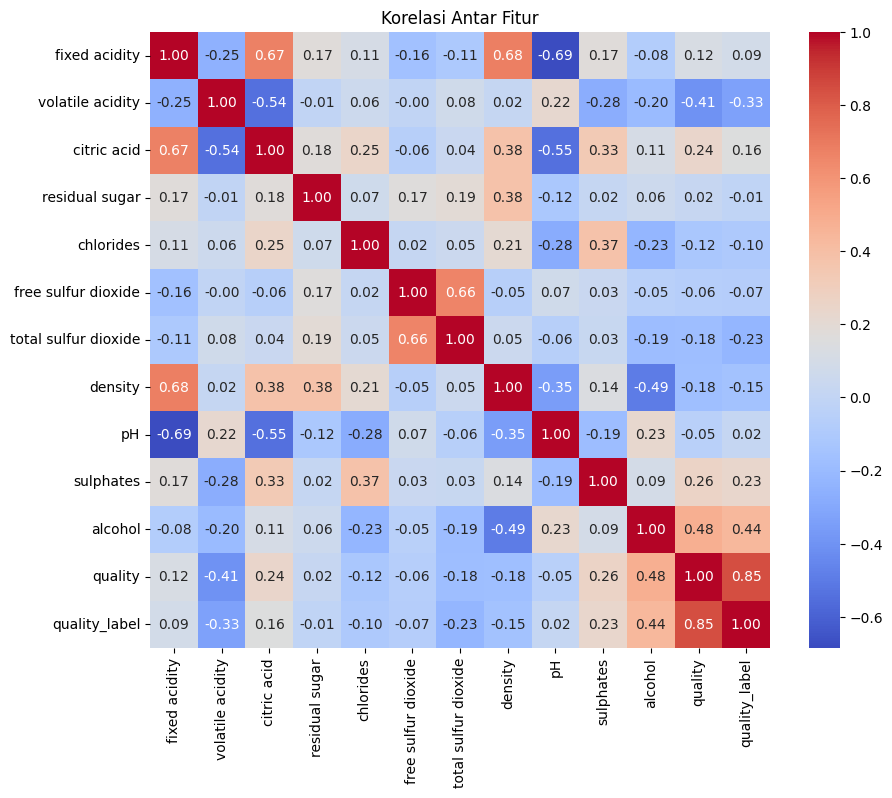

In [15]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()
